Through this exercise, we will aim to

+ Understand type of data we receive from Twitter
+ How to remove columns in a data frame
+ Prepare a dataframe with following columns: Company Name, Shorthand name, Description of company, number of tweets by each company
+ Find out if a company manages multiple twitter accounts
+ Find out number of original tweets in the dataset and create a dataframe
+ Count hashtags
+ Generate factor variables in Python
+ Analyze reaction to tweets
+ Perform a basic modeling
+ Analyze time series behavior of tweets


In [1]:
#We first import the packages that we would need for this case study
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib
%matplotlib inline

In [12]:
data = pd.read_csv('twitter_data.csv')
data.shape
data.head(10)
data.dtypes

rowid                                 int64
query                                object
tweet_id                              int64
tweet_id_str                          int64
inserted_date                        object
truncated                             int64
language                             object
possibly_sensitive                  float64
coordinates                          object
retweeted_status                     object
withheld_in_countries               float64
withheld_scope                      float64
created_at_text                      object
created_at                           object
month                                 int64
year                                  int64
content                              object
from_user_screen_name                object
from_user_id                          int64
from_user_followers_count             int64
from_user_friends_count               int64
from_user_listed_count                int64
from_user_favourites_count      

In [27]:
#Reading in data and looking at the number of rows and columns using shape 
twitter = pd.read_csv('/Users/vikrantdhawan/Dropbox/My Mac (Vikrant’s MacBook Air)/Downloads/Python/twitter_data.csv', sep=',')
twitter
twitter.shape


/Users/vikrantdhawan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,35,49,50,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(34097, 60)

In [5]:
twitter.head()
# twitter.columns

,rowid,query,tweet_id,tweet_id_str,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,...,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
0,67340,humanavitality,306897327585652736,306897327585652736,2014-03-09 13:46:50.222857,0,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
1,39454,FundacionPfizer,308616393706844160,308616393706844160,2014-03-09 13:38:20.679967,0,es,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1
2,2812,FundacionPfizer,388441368324218881,388441368324218881,2014-01-11 20:02:04.509695,0,es,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1
3,51601,Intelinvolved,326836137731694592,326836137731694592,2014-03-09 13:41:32.077436,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51,Intel,1,0
4,54665,CiscoCSR,381770853824090112,381770853824090112,2014-03-09 13:42:42.821992,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64,Cisco Systems,1,0


In [13]:
twitter.describe()

NameError: name 'twitter' is not defined

In [16]:
data.drop('created_at_text',1)

,rowid,query,tweet_id,tweet_id_str,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,...,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
0,67340,humanavitality,306897327585652736,306897327585652736,2014-03-09 13:46:50.222857,0,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
1,39454,FundacionPfizer,308616393706844160,308616393706844160,2014-03-09 13:38:20.679967,0,es,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1
2,2812,FundacionPfizer,388441368324218881,388441368324218881,2014-01-11 20:02:04.509695,0,es,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1
3,51601,Intelinvolved,326836137731694592,326836137731694592,2014-03-09 13:41:32.077436,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51,Intel,1,0
4,54665,CiscoCSR,381770853824090112,381770853824090112,2014-03-09 13:42:42.821992,0,en,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64,Cisco Systems,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34092,50957,Intelinvolved,387353662432870400,387353662432870400,2014-03-09 13:41:23.117364,0,en,0.0,NaN,THIS IS A RETWEET,...,UCBStartup,1773.0,65.0,1031.0,"Berkeley, CA",2013-10-07 19:44:14.000000,51,Intel,1,0
34093,15418,WalmartGreen,326736528971796481,326736528971796481,2014-03-09 13:31:07.536381,0,en,NaN,NaN,THIS IS A RETWEET,...,pewenvironment,11589.0,422.0,7005.0,Washington DC,2013-04-23 16:35:44.000000,2,Wal-Mart Stores,1,0
34094,46373,DellEDU,295912411439976448,295912411439976448,2014-03-09 13:40:05.412457,0,en,NaN,NaN,THIS IS A RETWEET,...,zakmal,2556.0,135.0,16068.0,NYC & Washington D.C.,2013-01-28 14:56:24.000000,44,Dell,0,1
34095,51449,Intelinvolved,337286518093778944,337286518093778944,2014-03-09 13:41:29.390309,0,sk,0.0,NaN,THIS IS A RETWEET,...,C2MTL,7548.0,225.0,4091.0,"Montreal, QC",2013-05-22 19:15:17.000000,51,Intel,1,0


In [17]:
#Removing columns we are not interested in
twitter = twitter.drop('created_at_text',1)
#1 1 is basically gives the axis
twitter = twitter.drop('tweet_id',1)
twitter.shape


NameError: name 'twitter' is not defined

In [23]:
len(data['from_user_screen_name'].unique())

42

In [76]:
#Identify unique user names that are tweeting
twitter['from_user_screen_name'].unique()

array(['humanavitality', 'FundacionPfizer', 'Intelinvolved', 'CiscoCSR',
       'IBMSmartCities', 'citizenIBM', 'BofA_Community', 'PG_CSDW',
       'mathmovesu', 'PPGIdeascapes', 'gehealthy', 'msftcitizenship',
       'TICalculators', 'CiscoEDU', 'DuPont_ability', 'Dell4Good',
       'verizongiving', 'DellEDU', 'SprintGreenNews', 'TeachingMoney',
       'WalmartGreen', 'ecomagination', 'WalmartAction',
       'Microsoft_Green', 'Comcastdreambig', 'DE_Youtility',
       'hpglobalcitizen', 'CitizenDisney', 'AmgenFoundation', 'ATTAspire',
       'AlcoaFoundation', 'nikebetterworld', 'HoneywellBuild',
       'googlestudents', '3M_FoodSafety', 'HeartRescue', 'EnviroSears',
       'ClickToEmpower', 'GreenIBM', 'PromesaPepsiCo', 'FordDriveGreen',
       'JNJStories'], dtype=object)

In [6]:
len(twitter['from_user_screen_name'].unique())

42

In [7]:
len(twitter['Company'].unique())

35

In [21]:
twitter[['from_user_screen_name','content','Company','from_user_description']]

,from_user_screen_name,content,Company,from_user_description
0,humanavitality,@louloushive (Tweet 2) We encourage other empl...,Humana,This is the official Twitter account for Human...
1,FundacionPfizer,¿Sabes por qué la #vacuna contra la #neumonía ...,Pfizer,Noticias sobre Responsabilidad Social y Fundac...
2,FundacionPfizer,RT @droso: @RodrigoReinaL con un tema muy inte...,Pfizer,Noticias sobre Responsabilidad Social y Fundac...
3,Intelinvolved,"""Every child is born a scientist. We’re all bo...",Intel,Connecting & enriching lives worldwide to crea...
4,CiscoCSR,RT @ClintonGlobal Watch Pres. @BillClinton's f...,Cisco Systems,Sharing stories about how Cisco and our partne...
...,...,...,...,...
34092,Intelinvolved,RT @UCBStartup: Thank you Intel Foundation! Th...,Intel,Connecting & enriching lives worldwide to crea...
34093,WalmartGreen,RT @pewenvironment: Currently @WalMartGreen us...,Wal-Mart Stores,"Together, we can create a sustainable world & ..."
34094,DellEDU,RT @zakmal: Can innovation happen at the schoo...,Dell,"Connecting with students, educators, school ad..."
34095,Intelinvolved,RT @C2MTL: #EYE50 finalist Kent Frankovich pre...,Intel,Connecting & enriching lives worldwide to crea...


In [24]:
def lll(x):
    y = Series(x)
    d=[]
    for i in y:
        d=d+[len(i)]
       
    z=min(d)
    
    for i in y:
       if len(i)==z:
         return(i)



lll(twitter['from_user_description'])


NameError: name 'twitter' is not defined

In [ ]:
def f(x):
    return pd.Series(dict(mean)

In [25]:
def f(x):
     return Series(dict(Number_of_tweets = x['content'].count(),
                        Month = x['month'].mean(),
                        Company=x['Company'].min(),
                        Description=x['from_user_description'].apply(lll),
                        ))

In [89]:
company_count = twitter.groupby('from_user_screen_name').apply(f) 
company_count.head(5)

,Number_of_tweets,Month,Company,Description
from_user_screen_name,,,,
3M_FoodSafety,325,6.021538,3M,29 3M Food Safety | global manufacturer ...
ATTAspire,336,5.491071,AT&T,29 Inspiring students to achieve their d...
AlcoaFoundation,1053,6.725546,Alcoa,"29 Since 1952, we’ve invested $590 milli..."
AmgenFoundation,135,7.333333,Amgen,29 The Amgen Foundation seeks to advance...
BofA_Community,1722,7.466899,Bank of America Corp.,29 We’re connecting local communities to...


In [87]:
twitter[twitter.from_user_screen_name=='ecomagination'][['from_user_screen_name','month']].describe()

,month
count,594.000000
mean,1.289562
std,0.453941
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [96]:
def f2(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        Company=x['Company'].max(),
                        Description=x['from_user_description'].max(),
                        ))
company_count2 = twitter.groupby('from_user_screen_name').apply(f2) 
company_count2
# company_count3 = twitter.groupby('from_user_screen_name').count()
# company_count3

,Number_of_tweets,Company,Description
from_user_screen_name,,,
3M_FoodSafety,325,3M,3M Food Safety | global manufacturer of innova...
ATTAspire,336,AT&T,Inspiring students to achieve their dreams.
AlcoaFoundation,1053,Alcoa,"Since 1952, we’ve invested $590 million to imp..."
AmgenFoundation,135,Amgen,The Amgen Foundation seeks to advance science ...
BofA_Community,1722,Bank of America Corp.,We’re connecting local communities to the peop...
CiscoCSR,2511,Cisco Systems,Sharing stories about how Cisco and our partne...
CiscoEDU,932,Cisco Systems,Tweets on the Cisco Connected Learning Experie...
CitizenDisney,211,Walt Disney,"We believe in the power of stories, families a..."
ClickToEmpower,149,Allstate,Click to Empower is a Web initiative of The Al...


In [94]:
twitter.count()
twitter.mean()

KeyboardInterrupt: 

In [ ]:
def fvik(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        Handle=x['from_user_screen_name'].min(),
                        Description=x['from_user_description'].min(),
                        ))
    
company_count2 = twitter.groupby('Company').apply(fvik)
company_count2

In [95]:
#Let us see how many twitter handles each company uses
counts = company_count.groupby('Company').size()
counts

Company
3M                                 1
AT&T                               1
Alcoa                              1
Allstate                           1
Amgen                              1
Bank of America Corp.              1
Capital One Financial              1
Cisco Systems                      2
Comcast                            1
Dell                               2
DuPont                             1
Duke Energy                        1
Ford Motor                         1
General Electric                   2
Google                             1
Hewlett-Packard                    1
Honeywell International            1
Humana                             1
Intel                              1
International Business Machines    3
Johnson & Johnson                  1
Medtronic                          1
Microsoft                          2
Nike                               1
PPG Industries                     1
PepsiCo                            1
Pfizer                        

In [96]:
#Number of tweets posted by each company. Any pattern here?
company_count = company_count.sort_values(['Number_of_tweets'], ascending=False)
company_count

,Number_of_tweets,Month,Company,Description
from_user_screen_name,,,,
verizongiving,2524,7.137876,Verizon Communications,29 We are focused on using technology to...
CiscoCSR,2511,7.202708,Cisco Systems,29 Sharing stories about how Cisco and o...
msftcitizenship,2493,4.618131,Microsoft,29 Sharing stories about how Microsoft a...
gehealthy,2461,5.440878,General Electric,"29 This account is currently inactive, b..."
WalmartAction,1915,6.525326,Wal-Mart Stores,29 Our Community Action Network works to...
TICalculators,1767,5.875495,Texas Instruments,29 Texas Instruments works w/ educators ...
BofA_Community,1722,7.466899,Bank of America Corp.,29 We’re connecting local communities to...
IBMSmartCities,1570,6.525478,International Business Machines,29 Official IBM Smarter Cities account. ...
Intelinvolved,1524,5.767060,Intel,29 Connecting & enriching lives worldwid...


<AxesSubplot:xlabel='from_user_screen_name'>

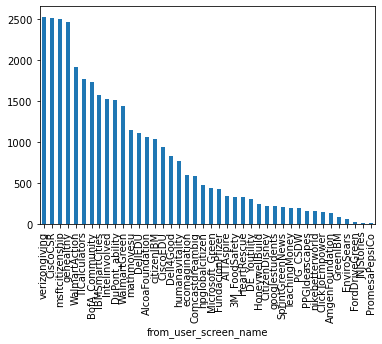

In [97]:
company_count['Number_of_tweets'].plot(kind='bar')

In [105]:
import calendar

In [106]:
twitter.head(2)

,rowid,query,tweet_id_str,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,withheld_in_countries,...,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
0,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,0,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
1,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,0,es,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1


In [107]:
twitter.dtypes

rowid                                 int64
query                                object
tweet_id_str                          int64
inserted_date                        object
truncated                             int64
language                             object
possibly_sensitive                  float64
coordinates                          object
retweeted_status                     object
withheld_in_countries               float64
withheld_scope                      float64
created_at                           object
month                                 int64
year                                  int64
content                              object
from_user_screen_name                object
from_user_id                          int64
from_user_followers_count             int64
from_user_friends_count               int64
from_user_listed_count                int64
from_user_favourites_count            int64
from_user_statuses_count              int64
from_user_description           

In [108]:
twitter['created_at'].head()

0    2013-02-27 22:43:19.000000
1    2013-03-04 16:34:17.000000
2    2013-10-10 23:10:13.000000
3    2013-04-23 23:13:02.000000
4    2013-09-22 13:23:59.000000
Name: created_at, dtype: object

In [31]:
twitter['created_at'] = pd.to_datetime(twitter['created_at'])
# twitter.date = twitter.created_at.date

AttributeError: 'Series' object has no attribute 'date'

In [101]:
twitter = twitter.set_index(['created_at'])
twitter.head(2)

,rowid,query,tweet_id,tweet_id_str,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,...,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area
created_at,,,,,,,,,,,,,,,,,,,,,
2013-02-27 22:43:19,67340,humanavitality,306897327585652736,306897327585652736,2014-03-09 13:46:50.222857,0,en,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79,Humana,0,1
2013-03-04 16:34:17,39454,FundacionPfizer,308616393706844160,308616393706844160,2014-03-09 13:38:20.679967,0,es,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40,Pfizer,0,1


In [114]:
def f(x):
     return Series(dict(Number_of_tweets = x['content'].count(), 
                        ))

In [104]:
daily_count = twitter.groupby(twitter.index.date).apply(f)
print(len(daily_count))
daily_count.index.name = 'date'
daily_count.head(5)

365


,Number_of_tweets,Month,Company,Description
date,,,,
2013-01-01,24,1.0,3M,created_at 2013-12-31 23:46:04 A forum for ...
2013-01-02,71,1.0,3M,created_at 2013-12-31 23:46:04 Tweets on th...
2013-01-03,94,1.0,AT&T,created_at 2013-12-31 23:46:04 Texas Instru...
2013-01-04,97,1.0,3M,created_at 2013-12-31 23:46:04 News from P&...
2013-01-05,38,1.0,3M,created_at 2013-12-31 23:46:04 A forum for ...


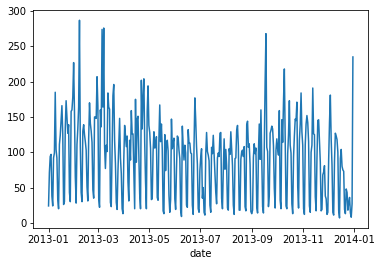

In [105]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line')

In [121]:

daily_count['old_date_tweets'] = daily_count['Number_of_tweets'].shift(-1)
daily_count

,Number_of_tweets,old_date_tweets
date,,
2013-01-01,24,71.0
2013-01-02,71,94.0
2013-01-03,94,97.0
2013-01-04,97,38.0
2013-01-05,38,24.0
...,...,...
2013-12-27,36,14.0
2013-12-28,14,8.0
2013-12-29,8,27.0


In [122]:
daily_count.corr(method ='pearson')

,Number_of_tweets,old_date_tweets
Number_of_tweets,1.000000,0.451023
old_date_tweets,0.451023,1.000000


In [123]:
weekday_count = twitter.groupby(twitter.index.weekday).apply(f)
print(len(weekday_count))
weekday_count

7


,Number_of_tweets
created_at,
0,5520
1,6649
2,7092
3,6475
4,5593
5,1694
6,1074


In [106]:
hourly_count = twitter.groupby(twitter.index.hour).apply(f)
print(len(hourly_count))
hourly_count

24


,Number_of_tweets,Month,Company,Description
created_at,,,,
0,1141,6.094654,3M,created_at 2013-10-10 23:10:13 Tweets on th...
1,914,6.276805,3M,created_at 2013-10-10 23:10:13 Texas Instru...
2,462,6.417749,3M,created_at 2013-10-10 23:10:13 Tweets on th...
3,269,5.460967,3M,created_at 2013-10-10 23:10:13 Our Communit...
4,201,5.383085,3M,created_at 2013-10-10 23:10:13 Connecting &...
5,245,4.738776,3M,created_at 2013-10-10 23:10:13 Sharing stor...
6,146,4.698630,Cisco Systems,created_at 2013-10-10 23:10:13 Our Communit...
7,93,5.580645,Cisco Systems,created_at 2013-10-10 23:10:13 Sharing stor...
8,117,6.324786,Cisco Systems,created_at 2013-10-10 23:10:13 Our Communit...


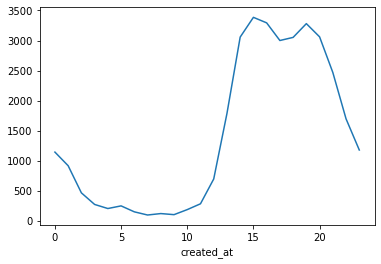

In [111]:
hourly_plot = hourly_count['Number_of_tweets'].plot()

<AxesSubplot:xlabel='created_at'>

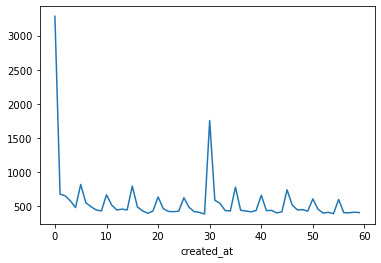

In [118]:
minute_count=twitter.groupby(twitter.index.minute).tweet_id.count()
minute_count
minute_count.plot()

In [140]:
minute_count = twitter.groupby(['from_user_screen_name',twitter.index.minute]).apply(f)
print(len(minute_count))
minute_count.unstack(1)

2259


Number_of_tweets                                       \
created_at                          0      1     2     3     4     5     6    
from_user_screen_name                                                         
3M_FoodSafety                      3.0    2.0   3.0   6.0   3.0  21.0  16.0   
ATTAspire                         85.0    8.0   NaN   5.0   NaN  21.0   NaN   
AlcoaFoundation                   16.0   15.0  25.0  12.0  26.0  22.0  20.0   
AmgenFoundation                   83.0    3.0   2.0   1.0   3.0   NaN   2.0   
BofA_Community                   398.0   26.0  27.0  20.0  11.0  35.0  15.0   
CiscoCSR                          46.0   53.0  57.0  79.0  55.0  36.0  41.0   
CiscoEDU                         216.0   11.0  14.0   5.0   9.0  13.0   5.0   
CitizenDisney                      4.0    4.0   3.0   3.0   3.0   6.0   5.0   
ClickToEmpower                     3.0    1.0   5.0   2.0   2.0   2.0   2.0   
Comcastdreambig                    6.0   12.0  10.0   8.0   7.0  10.0  10.0   
DE_Youtility                       7.0    7.0   5.0   3.0   5.0   3.0   7.0   
Dell4Good                        204.0    9.0  11.0   6.0   9.0  15.0   8.0   
DellEDU                           33.0   12.0   6.0  17.0  17.0  21.0  20.0   
DuPont_ability                   580.0   13.0  17.0  16.0  10.0  10.0  13.0   
EnviroSears                        NaN    3.0   NaN   1.0   1.0   NaN   1.0   
FordDriveGreen                     1.0    NaN   NaN   NaN   NaN   1.0   NaN   
FundacionPfizer                    5.0    4.0   6.0   2.0   6.0  19.0   7.0   
GreenIBM                           1.0    1.0   NaN   2.0   4.0   2.0   1.0   
HeartRescue                       41.0    3.0   7.0   5.0   2.0   5.0   4.0   
HoneywellBuild                     6.0    4.0   2.0   2.0   5.0   6.0   8.0   
IBMSmartCities                    45.0   46.0  18.0  15.0  12.0  88.0  23.0   
Intelinvolved                     62.0   21.0  28.0  37.0  23.0  41.0  22.0   
JNJStories                         1.0    NaN   NaN   NaN   NaN   1.0   NaN   
Microsoft_Green                   32.0    4.0  17.0   7.0   5.0   9.0   4.0   
PG_CSDW                            NaN    8.0   5.0   4.0   3.0   3.0   5.0   
PPGIdeascapes                      NaN    NaN   NaN   2.0   2.0   6.0   8.0   
PromesaPepsiCo                     NaN    NaN   NaN   NaN   NaN   NaN   1.0   
SprintGreenNews                    NaN    NaN   7.0   3.0   3.0   3.0   4.0   
TICalculators                    158.0   47.0  56.0  25.0  14.0  57.0  26.0   
TeachingMoney                      2.0    3.0   4.0   1.0   6.0   3.0   8.0   
WalmartAction                     37.0   38.0  25.0  27.0  42.0  42.0  29.0   
WalmartGreen                      51.0   24.0  35.0  30.0  26.0  30.0  18.0   
citizenIBM                        11.0   11.0  21.0  33.0  13.0  74.0  46.0   
ecomagination                      9.0    8.0  13.0   6.0   9.0  10.0  10.0   
gehealthy                         49.0   38.0  48.0  45.0  40.0  49.0  46.0   
googlestudents                     5.0    2.0   7.0   5.0   4.0   7.0   3.0   
hpglobalcitizen                    7.0    6.0   9.0   9.0   8.0   9.0   7.0   
humanavitality                    34.0   15.0  16.0  10.0  11.0  18.0  18.0   
mathmovesu                       154.0   78.0  51.0  37.0  17.0  24.0  13.0   
msftcitizenship                  595.0   36.0  31.0  40.0  32.0  45.0  35.0   
nikebetterworld                    8.0    3.0   2.0   5.0   4.0   3.0   4.0   
verizongiving                    286.0  102.0  63.0  46.0  33.0  53.0  38.0   

                                         ...                                \
created_at               7     8     9   ...    50    51    52    53    54   
from_user_screen_name                    ...                                 
3M_FoodSafety           3.0   7.0   5.0  ...   8.0   5.0   3.0   8.0   2.0   
ATTAspire               4.0   2.0   1.0  ...  11.0   4.0   NaN   3.0   2.0   
AlcoaFoundation        18.0  13.0  13.0  ...  19.0  25.0  11.0  10.0  14.0  

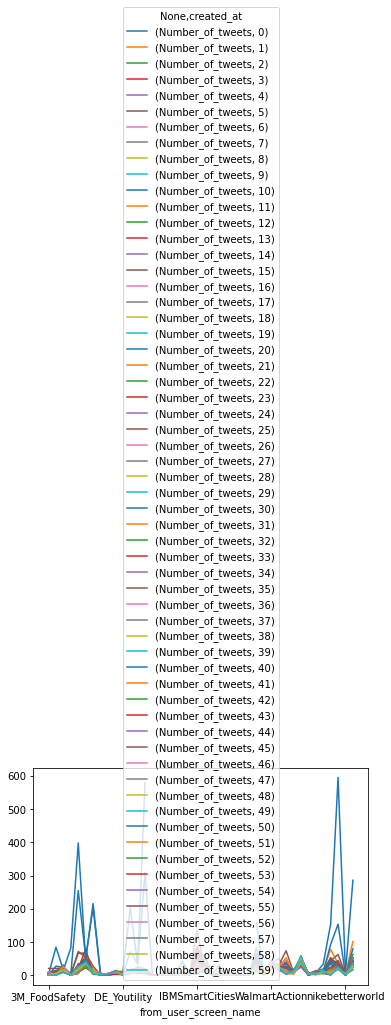

In [163]:
df=minute_count.unstack(1)
df2=df
df2.plot().legend=None

In [108]:
second_count = twitter.groupby(twitter.index.second).apply(f)
print(len(second_count))
second_count.head()

60


,Number_of_tweets,Month,Company,Description
created_at,,,,
0,1245,8.259438,3M,created_at 2013-09-22 13:23:59 DuPont susta...
1,1672,6.712321,3M,created_at 2013-09-22 13:23:59 News from De...
2,1771,6.010728,3M,created_at 2013-09-22 13:23:59 Connecting &...
3,1174,5.661840,3M,created_at 2013-09-22 13:23:59 This account...
4,954,5.602725,3M,created_at 2013-09-22 13:23:59 We’re connec...


<AxesSubplot:xlabel='created_at'>

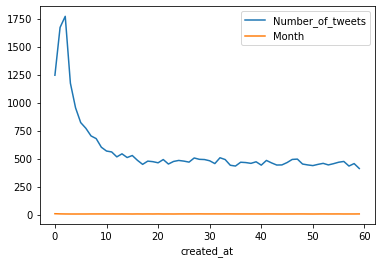

In [110]:
second_count.plot()

In [ ]:
# tell me the corelation between current date and next day.find corr cofficient
#minutes pattern consistent across all handles or not
